**Video presentation**
https://youtu.be/eagBJ7ll9EE

**Data Preprocessing**

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('worldvalues-data.csv')

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,5,6,7,8,9,10,11,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,46,47,48,49,50,51,52,53,54,55,62,63,64,65,66,67,68,69,70,71,77,84,85,86,87,88,89,90,91,92,93,94,95,96,97,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,122,123,124,125,126,127,144,145,146,147,148,149,150,162,163,167,168,169,170,171,177,178,179,180,181,182,183,184,185,190,191,192,193,194,195,196,197,198,199,206,207,208,217,218,234,239,244,245,246,264,281,282,283,295,296,298,302,303,304,305,308,309,310,311,312,313,314,315,316,321,322,323,327,332,335,337,346,347,348,349,351,352,353,436) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.isnull().sum().sum()

9022

In [8]:
print('Original Size:', df.shape)

df.dropna(how = 'any', inplace=True)
print('Size After Dropping Rows with NaN in any Column:', df.shape)

Original Size: (89565, 440)
Size After Dropping Rows with NaN in any Column: (80543, 440)


In [19]:
#Creates an age bucket for each participant using the age variable (V242)
def age_group(age):
    if age < 30:
        bucket = '10-29'
    if age in range (30,50):
        bucket = '30-49'
    if age >= 50:
        bucket = '50+'
    return bucket

In [37]:
#Replace answers (Dont know, No answer...) of column age with global median age: 30
df['V242'] = df['V242'].replace(dict.fromkeys(['Dont know',"Missing; Unknown SG: Refused{Missing}",'No answer','Not applicable'], '30'))

#Convert data type of column V242 from object to integer
df['V242'] = df['V242'].astype(int)

In [39]:
#Add new column "age_group" to dataset
df['age_group'] = df['V242'].apply(age_group)
df['age_group'].head()

0    10-29
1    10-29
2    10-29
3    10-29
4    30-49
Name: age_group, dtype: object

**Important things in life**

Family (V4)

In [64]:
#As values in column V4 include 2 types of data, I converted them all into string
df['V4'] = df['V4'].astype(str)

In [65]:
crosstab1 = round(pd.crosstab(df.age_group, df.V4, normalize = "index")*100, 1)
crosstab1

V4,1,2,3,4,"BH,HT: Missing; AR,DE,SE: Inapplicable;RU: Inappropriate response{Inappropriate}",Dont know,No answer
age_group,,,,,,,
10-29,91.9,6.8,0.7,0.3,0.0,0.2,0.1
30-49,93.1,5.8,0.6,0.3,0.0,0.2,0.1
50+,91.3,6.7,1.0,0.4,0.0,0.4,0.1


In [68]:
crosstab1_new = crosstab1.rename(columns = {'1':'Very important','2':'Rather important','3':'Not very important','4':"Not at all important", 
                                            "BH,HT: Missing; AR,DE,SE: Inapplicable;RU: Inappropriate response{Inappropriate}":'Inappropriate'})
crosstab1_new

V4,Very important,Rather important,Not very important,Not at all important,Inappropriate,Dont know,No answer
age_group,,,,,,,
10-29,91.9,6.8,0.7,0.3,0.0,0.2,0.1
30-49,93.1,5.8,0.6,0.3,0.0,0.2,0.1
50+,91.3,6.7,1.0,0.4,0.0,0.4,0.1


In [41]:
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
sns.set(color_codes=True) 

Text(0.5, 1.0, 'Is family the important thing?')

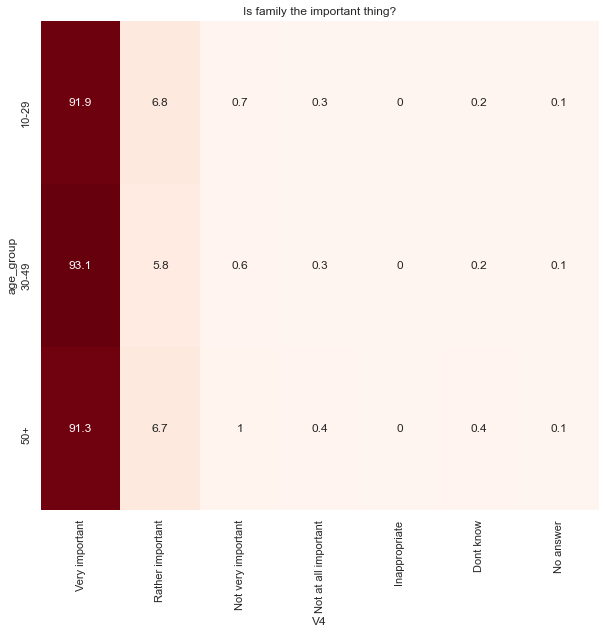

In [79]:
fig, ax = plt.subplots(figsize=(10,9)) 
sns.heatmap(crosstab1_new, cmap="Reds", annot=True, cbar=False, fmt='g')
ax.set_title("Is family the important thing?")

Leisure time (V6)

In [91]:
df['V6'] = df['V6'].astype(str)
crosstab2 = round(pd.crosstab(df.age_group, df.V6, normalize = "index")*100, 1)
crosstab2_new = crosstab2.rename(columns = {'1':'Very important','2':'Rather important','3':'Not very important','4':"Not at all important", 
                                            "AR,DE,SE: Inapplicable;RU: Inappropriate response{Inappropriate}":'Inappropriate'})

Text(0.5, 1.0, 'Is leisure time the important thing?')

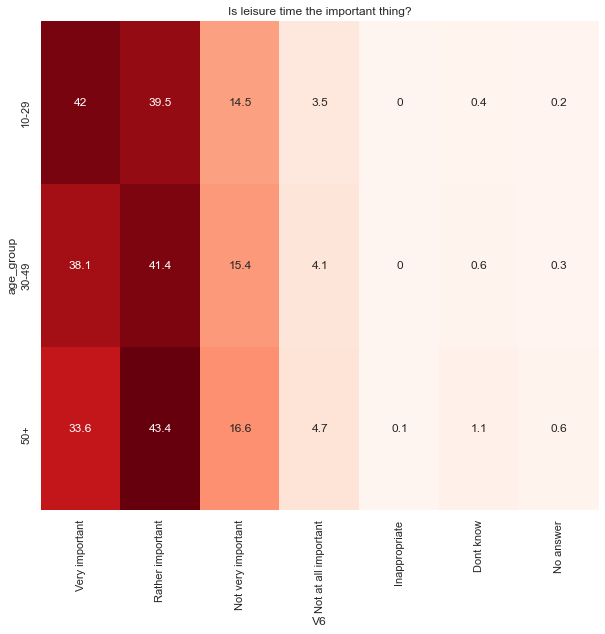

In [92]:
fig, ax = plt.subplots(figsize=(10,9)) 
sns.heatmap(crosstab2_new, cmap="Reds", annot=True, cbar=False, fmt='g')
ax.set_title("Is leisure time the important thing?")

Politics (V7)

In [89]:
df['V7'] = df['V7'].astype(str)
crosstab3 = round(pd.crosstab(df.age_group, df.V7, normalize = "index")*100, 1)
crosstab3_new = crosstab3.rename(columns = {'1':'Very important','2':'Rather important','3':'Not very important','4':"Not at all important", 
        "HT: Missing; PS,SE: Inapplicable;RU: Inappropriate response{Inappropriate}":'Inappropriate'})

Text(0.5, 1.0, 'Is politics the important thing?')

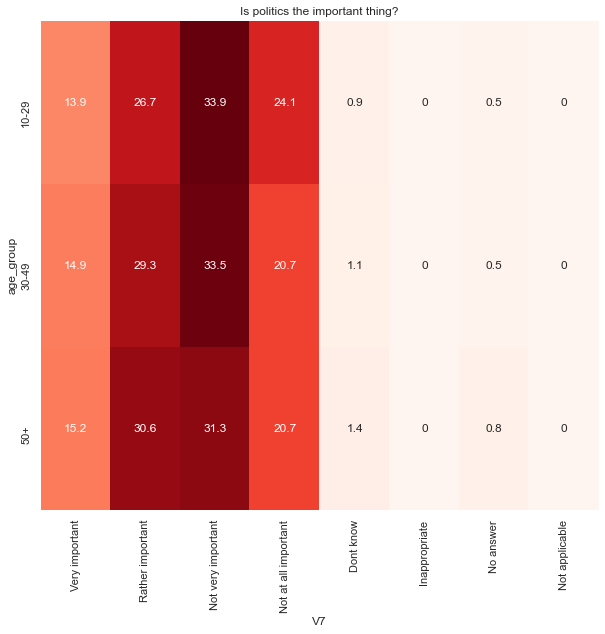

In [93]:
fig, ax = plt.subplots(figsize=(10,9)) 
sns.heatmap(crosstab3_new, cmap="Reds", annot=True, cbar=False, fmt='g')
ax.set_title("Is politics the important thing?")

**Religion**

Most popular religions (V144)

In [127]:
religion = df['V144'].value_counts().rename_axis('Religion').reset_index(name='Number of respondents')
top_religion = religion.nlargest(5,['Number of respondents'])
top_religion

,Religion,Number of respondents
0,Muslim,16166
1,Roman Catholic,14138
2,None,13941
3,Orthodox,8017
4,Protestant,5479


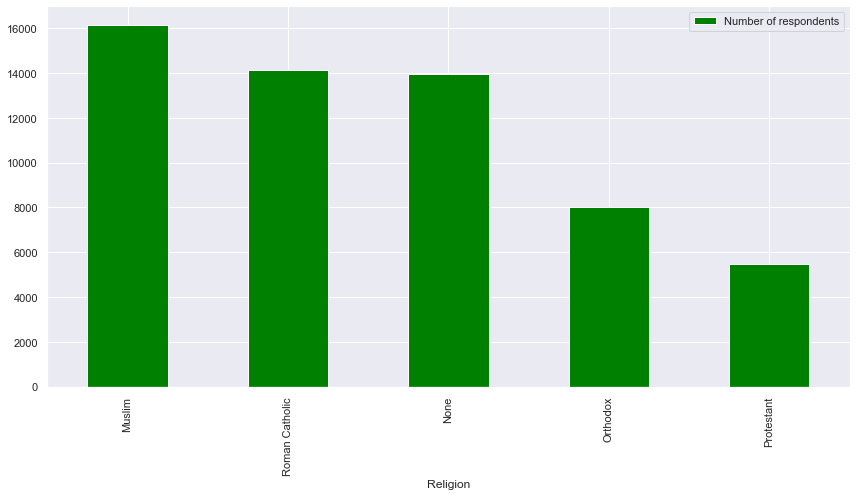

In [130]:
top_religion.plot.bar(x = 'Religion',stacked=False,subplots=False, figsize=(12,7), color='green')
plt.tight_layout()
plt.show()

Religious person (V147)

In [119]:
#Drop answers like "Not asked in survey", "Not applicable", "Dont know" to count only answers Yes, No
df['V147'] = df['V147'].astype(str)
df_V147 = df[df['V147'].isin(['1', '2', '3'])]

Text(0.5, 1.0, 'A religious person or not?')

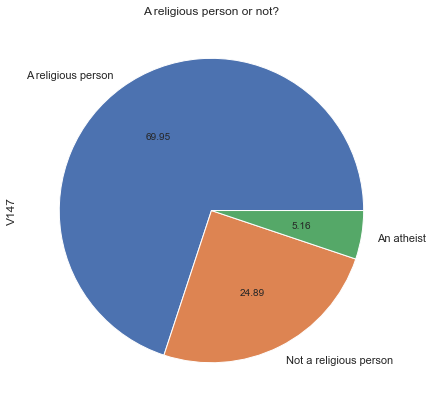

In [126]:
V147 = df_V147['V147'].replace({'1' : 'A religious person','2' : 'Not a religious person', '3' : 'An atheist',})
V147.value_counts().plot.pie(autopct='%.2f', figsize=(7, 7))
plt.title('A religious person or not?')

**Technology**

Viewpoint on development of technology by employment status (V68)

In [129]:
df_V229 = df[df['V229'].isin(['Full time', 'Housewife', 'Part time', 'Retired', 'Self employed', 'Students', 'Unemployed'])]

In [145]:
df_V229['V68'] = df_V229['V68'].astype(str)
crosstab4 = pd.crosstab(df_V229.V229, df_V229.V68)
crosstab4_new = crosstab4.rename(columns = {'1':'Good thing','2':"Don't mind",'3':'Bad thing', 
                                            "HT: Dropped out survey;EC,DE,SE:Inapplicable; RU:Inappropriate response{Inappropriate}":'Inappropriate'})

#Add a column by summing up the last 3 columns of crosstab4_new
crosstab4_new['Not applicable']=crosstab4_new.iloc[:, 3:7].sum(axis=1)

#Delete the 3 columns Dont know, Inappropriate, No answer
crosstab4_new.drop(['Dont know', 'Inappropriate','No answer'], axis=1, inplace=True)
crosstab4_new

<ipython-input-145-a9bfa4417a4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_V229['V68'] = df_V229['V68'].astype(str)


V68,Good thing,Don't mind,Bad thing,Not applicable
V229,,,,
Full time,17088,6108,1578,597
Housewife,7408,2698,745,750
Part time,4411,1879,533,257
Retired,6420,2600,602,564
Self employed,6549,2319,621,377
Students,4191,1258,355,120
Unemployed,4829,1851,513,259


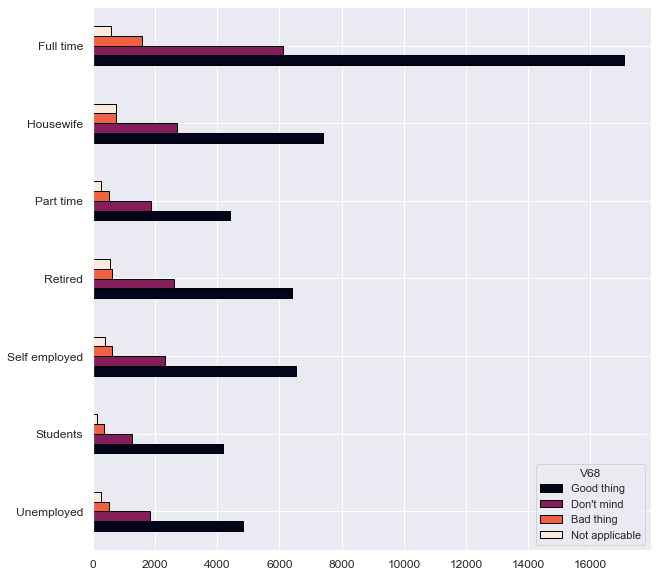

In [147]:
crosstab4_new.sort_index(ascending=False).plot(
    kind='barh',
    figsize=(10, 10),
    cmap='rocket',
    edgecolor='black',
    fontsize=12,
    ).yaxis.label.set_visible(False)

The world is better off, or worse off, because of science and technology (V197)

In [166]:
#Replace value "A lot worse off" with 1 in column V197
df_V229['V197'] = df_V229['V197'].replace(to_replace = 'A lot worse off', value = '1')

#Convert data type of all values in column V197 to integer
df_V229['V197'] = df_V229['V197'].astype(int)

<ipython-input-166-c3ebd519304b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_V229['V197'] = df_V229['V197'].replace(to_replace = 'A lot worse off', value = '1')
<ipython-input-166-c3ebd519304b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_V229['V197'] = df_V229['V197'].astype(int)


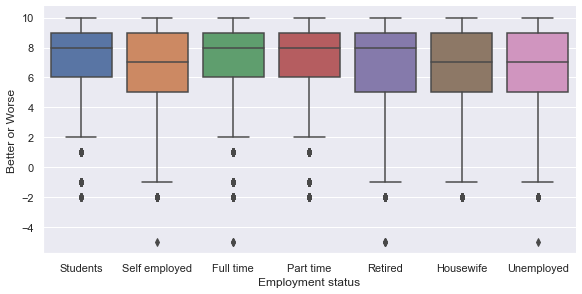

In [172]:
sns.catplot( 
    data = df_V229.rename(columns = {"V229" : "Employment status", "V197" : "Better or Worse"}), 
            x="Employment status", y="Better or Worse", kind="box", height = 4, aspect = 2
);

**Democracy**

Democracy: The state makes people's income equal (V137)

In [148]:
#Remove "not applicable", "dont know"... in social class column
df_V238 = df[df['V238'].isin(['Working class', 'Lower class', 'Lower middle class', 'Upper middle class', 'Upper class'])]

In [151]:
#Replace value "Not an essential characteristic of democracy" with 1 in column V137
df_V238['V137'] = df_V238['V137'].replace(to_replace = 'Not an essential characteristic of democracy', value = '1')

#Convert data type of all values in column V137 to integer
df_V238['V137'] = df_V238['V137'].astype(int)

<ipython-input-151-246634532ec6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_V238['V137'] = df_V238['V137'].replace(to_replace = 'Not an essential characteristic of democracy', value = '1')
<ipython-input-151-246634532ec6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_V238['V137'] = df_V238['V137'].astype(int)


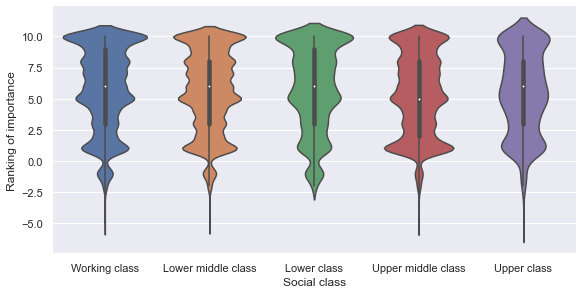

In [174]:
sns.catplot(
    data = df_V238.rename(columns = {"V238" : "Social class", "V137" : "Ranking of importance"}), height = 4, aspect = 2,
    x = "Social class",
    y = "Ranking of importance",
    kind = "violin"
)

Importance of democracy (V140)

In [162]:
df_V238['V140'] = df_V238['V140'].replace(to_replace = 'Not at all important', value = '1')
df_V238['V140'] = df_V238['V140'].astype(int)

<ipython-input-162-7b5772d6287a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_V238['V140'] = df_V238['V140'].replace(to_replace = 'Not at all important', value = '1')
<ipython-input-162-7b5772d6287a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_V238['V140'] = df_V238['V140'].astype(int)


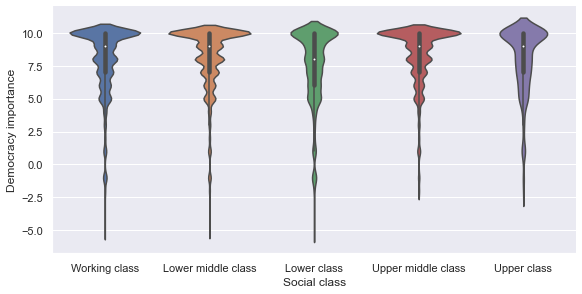

In [163]:
sns.catplot(
    data = df_V238.rename(columns = {"V238" : "Social class", "V140" : "Democracy importance"}), height = 4, aspect = 2,
    x = "Social class",
    y = "Democracy importance",
    kind = "violin"
)